# Imports & file locations

In [1]:
%load_ext autoreload
%autoreload 2

import itertools
import os

import numpy as np
import scanpy 
import scanpy as sc
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import anndata

# Olga's modules
import xspecies

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

# From https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html
# You can use pandas.IndexSlice to facilitate a more natural syntax using :, rather than using slice(None).
idx = pd.IndexSlice


anndata.__version__

scanpy.settings.verbosity = 3
#sc.set_figure_params(dpi=200, dpi_save=300)
scanpy.logging.print_versions()
scanpy.set_figure_params(frameon=False, color_map='magma_r')

-----
anndata     0.7.5
scanpy      1.7.0rc1
sinfo       0.3.1
-----
anndata             0.7.5
autoreload          NA
backcall            0.1.0
cairo               1.18.2
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.0
decorator           4.4.1
get_version         2.1
h5py                2.10.0
igraph              0.7.1
importlib_metadata  0.19
ipykernel           5.1.3
ipython_genutils    0.2.0
jedi                0.15.1
joblib              0.14.1
kiwisolver          1.1.0
legacy_api_wrap     0.0.0
leidenalg           0.7.0
llvmlite            0.30.0
louvain             0.6.1
matplotlib          3.1.2
more_itertools      NA
mpl_toolkits        NA
natsort             6.2.0
numba               0.46.0
numexpr             2.7.0
numpy               1.17.3
packaging           20.8
pandas              1.1.4
parso               0.5.1
pexpect             4.7.0
pickleshare         0.7.5
pkg_resources       NA
prompt_toolkit      3.0.2
ptypro

## Matplotlibrc

In [2]:
%%file matplotlibrc

# Non-interactive backend
backend: TkAgg

# Editable text on pdf export
pdf.fonttype: 42
ps.fonttype: 42

# Don't warn about too many figures open
figure.max_open_warning: 0

# Figure saving
savefig.transparent: True
savefig.bbox: tight
savefig.dpi: 300

# Fonts
font.sans-serif: Arial

Overwriting matplotlibrc


## Output, input directories

In [3]:
indir_local = '/home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/cross-species/'

In [4]:

outdir_gdrive = "/home/olga/googledrive/TabulaMicrocebus/data/cross-species"
outdir_local = "/home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/cross-species"
outdirs = outdir_local, outdir_gdrive

# Google drive figure output folder
FIGURE_FOLDER = "/home/olga/googledrive/TabulaMicrocebus/analysis/cross-species--bladder-blood-lung-muscle"
# !ls -lha $outdir_local

GDRIVE_ANALYSIS_DIR = '/home/olga/googledrive/TabulaMicrocebus/analysis/cross-species--bladder-blood-lung-muscle'

## Constants

In [5]:
groupby = "narrow_group"
species = "species"

tissue = "blood"

figure_folder_base = os.path.join(FIGURE_FOLDER, tissue, "differential-expression")

# Load data

In [6]:
%%time

h5ad = os.path.join(
    outdir_local,
    f"concatenated__human-lemur-mouse_10x__one2one_orthologs__{tissue}__preprocessed.h5ad",
)
adata = scanpy.read_h5ad(h5ad)
adata

CPU times: user 233 ms, sys: 341 ms, total: 575 ms
Wall time: 1.6 s


AnnData object with n_obs × n_vars = 33103 × 12496
    obs: 'age', 'cell_id', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'n_genes', 'sex', 'subtissue', 'tissue', 'species', 'species_latin', 'channel', 'sequencing_run', 'cell_barcode', 'n_counts', 'individual', 'narrow_group', 'broad_group', 'compartment_group', 'cell_id_v1', 'cell_id_v2', 'species_batch', 'compartment_broad', 'compartment_narrow', 'compartment_broad_narrow', 'compartment_species', 'compartment_narrow_species', 'log_counts', 'sqrt_counts'
    var: 'mouse_lemur__gene_name-human_hlca', 'mouse__gene_name-human_hlca', 'ensembl_id-human_sapiens', 'len-human_sapiens', 'mouse_lemur__gene_name-lemur', 'mouse__gene_name-lemur', 'name-lemur', 'highly_variable-lemur', 'mouse_lemur__gene_name-mouse_ce', 'mouse__gene_name-mouse_ce', 'n_cells-mouse_tabula_muris_senis', 'mouse_lemur__gene_name-mouse_tabula_muris_senis', 'mouse__gene_name-mouse_tabula_muris_senis', 'n_cells', 'highly_variable', 'means', 'dispersions'

## Make CrossSpeciesComparison object

In [7]:
cross_species = xspecies.CrossSpeciesComparison(adata, 'compartment_narrow')
# cross_species.plot_shared_cell_types()

compartment_narrow             species    
lymphoid: B cell               Mouse           1834
                               Mouse lemur      674
                               Human            230
lymphoid: CD4+ T cell          Mouse            570
                               Mouse lemur     1645
                               Human           2297
lymphoid: CD8+ T cell          Mouse            467
                               Mouse lemur      153
                               Human           1942
lymphoid: natural killer cell  Mouse            535
                               Mouse lemur      374
                               Human           3698
myeloid: macrophage            Mouse            338
                               Mouse lemur       33
                               Human          13737
myeloid: monocyte              Mouse           1446
                               Mouse lemur     1292
                               Human           1838
dtype: int64


extracting highly variable genes



------- group: lymphoid: B cell -------
number of cells: 2738


computing PCA
    on highly variable genes
    with n_comps=50


Scanpy had an error when computing highly variable genes, using previous ones


    finished (0:00:01)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:05)


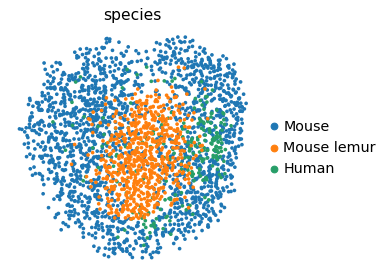

extracting highly variable genes
    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



------- group: lymphoid: CD4+ T cell -------
number of cells: 4512

 Number of highly variable genes: 2620


    finished (0:00:01)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:08)


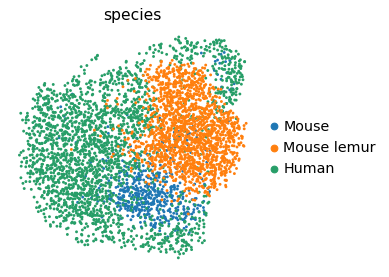

extracting highly variable genes



------- group: lymphoid: CD8+ T cell -------
number of cells: 2562


    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



 Number of highly variable genes: 2856


    finished (0:00:01)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:05)


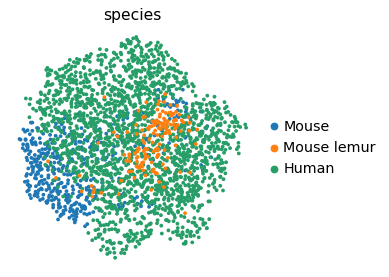

extracting highly variable genes
    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



------- group: lymphoid: natural killer cell -------
number of cells: 4607

 Number of highly variable genes: 2845


    finished (0:00:01)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:08)


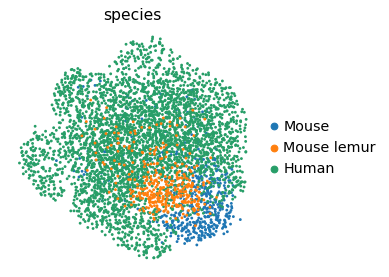

extracting highly variable genes



------- group: myeloid: macrophage -------
number of cells: 14108


    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



 Number of highly variable genes: 2631


    finished (0:00:06)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:07)


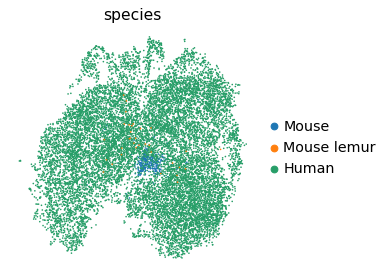

extracting highly variable genes



------- group: myeloid: monocyte -------
number of cells: 4576


    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



 Number of highly variable genes: 2605


    finished (0:00:01)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:07)


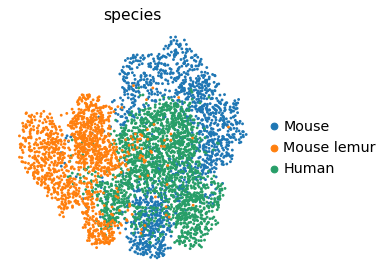

extracting highly variable genes
computing PCA
    on highly variable genes
    with n_comps=50



------- group: lymphoid: B cell -------
number of cells: 2738
Scanpy had an error when computing highly variable genes, using previous ones


    finished (0:00:01)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:05)


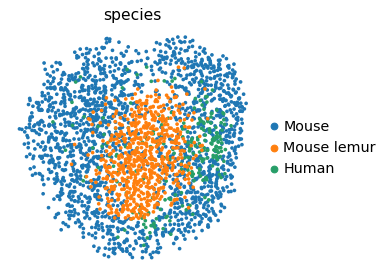

extracting highly variable genes
    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



------- group: lymphoid: CD4+ T cell -------
number of cells: 4512

 Number of highly variable genes: 2620


    finished (0:00:00)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:08)


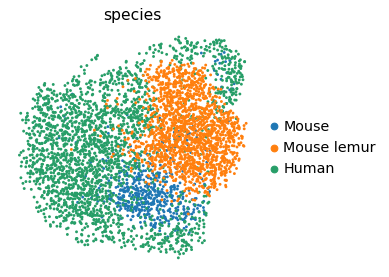

extracting highly variable genes
    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



------- group: lymphoid: CD8+ T cell -------
number of cells: 2562

 Number of highly variable genes: 2856


    finished (0:00:00)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:05)


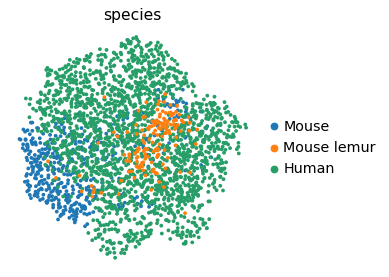

extracting highly variable genes
    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



------- group: lymphoid: natural killer cell -------
number of cells: 4607

 Number of highly variable genes: 2845


    finished (0:00:01)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:08)


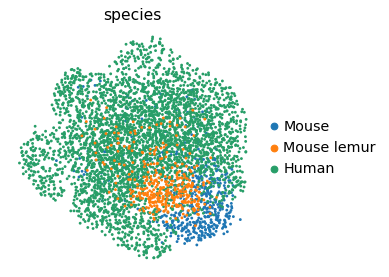

extracting highly variable genes



------- group: myeloid: macrophage -------
number of cells: 14108


    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



 Number of highly variable genes: 2631


    finished (0:00:06)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:07)


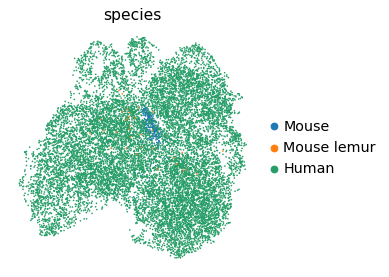

extracting highly variable genes
    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes



------- group: myeloid: monocyte -------
number of cells: 4576

 Number of highly variable genes: 2605


    with n_comps=50
    finished (0:00:01)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:07)


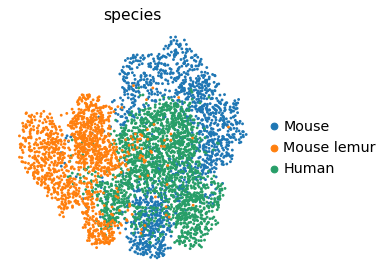

extracting highly variable genes
computing PCA
    on highly variable genes
    with n_comps=50



------- group: Mouse -------
number of cells: 5190
Scanpy had an error when computing highly variable genes, using previous ones


    finished (0:00:01)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:05)


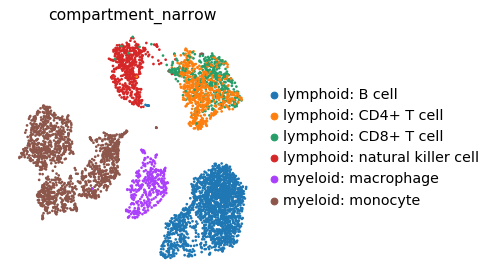

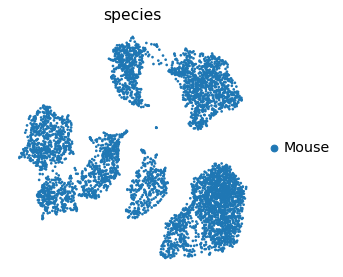

extracting highly variable genes
computing PCA
    on highly variable genes
    with n_comps=50



------- group: Mouse lemur -------
number of cells: 4171
Scanpy had an error when computing highly variable genes, using previous ones


    finished (0:00:01)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:04)


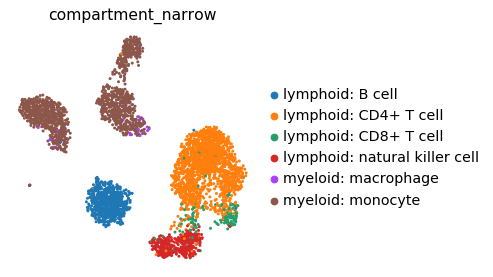

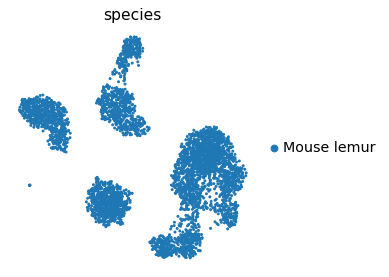

extracting highly variable genes



------- group: Human -------
number of cells: 23742


    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



 Number of highly variable genes: 2706


    finished (0:00:06)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:10)


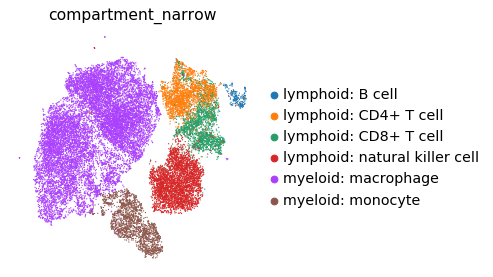

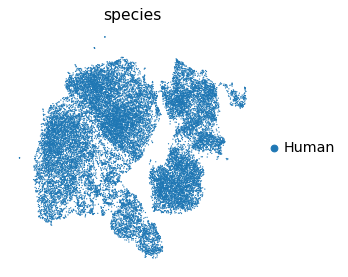

In [8]:
cross_species.make_mini_adatas(groupby='compartment_narrow')
cross_species.make_subset_adatas()

## Do differential expression

ranking genes



------- group: lymphoid: B cell -------


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)


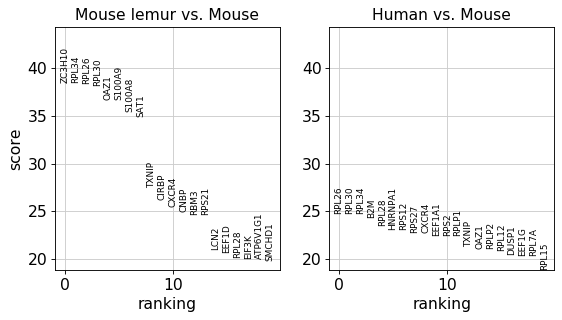

ranking genes



------- group: lymphoid: CD4+ T cell -------


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)


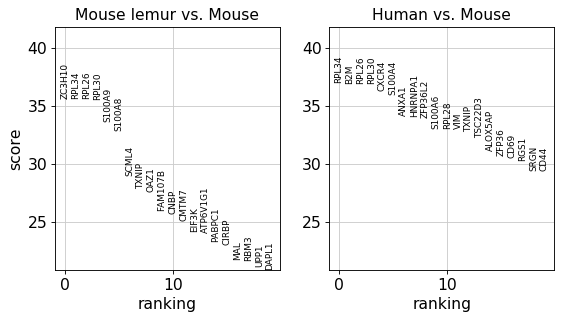

ranking genes



------- group: lymphoid: CD8+ T cell -------


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:02)


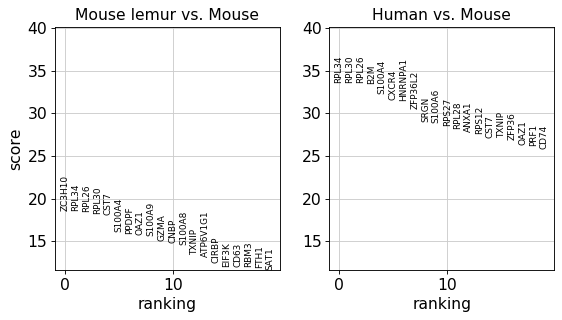

ranking genes



------- group: lymphoid: natural killer cell -------


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:04)


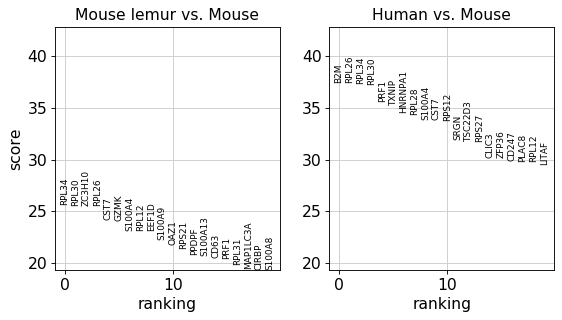

ranking genes



------- group: myeloid: macrophage -------


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:14)


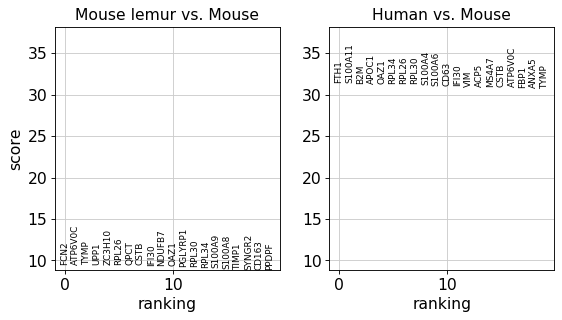

ranking genes



------- group: myeloid: monocyte -------


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:04)


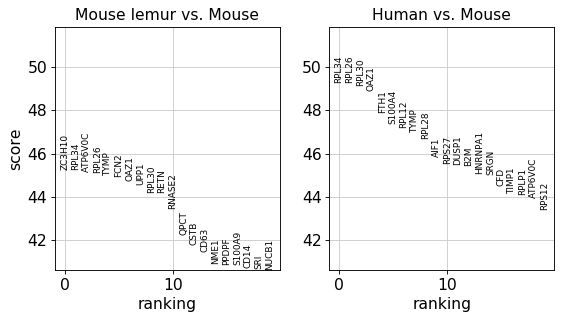

In [9]:
cross_species.do_differential_expression(method='wilcoxon')

# Make dotplots

## Figure folder base

In [10]:
save_folder = os.path.join(figure_folder_base, 'dotplots')
! mkdir -p $save_folder
sc.settings.figdir = save_folder

## Get list of dissociation genes

In [11]:
dissociation_genes = set(pd.read_csv('/home/olga/data_lg/data_sm_copy/immune-evolution/databases/nuisance-genes/dissociation_genes_3Nov2020.csv', index_col=0, squeeze=True))
len(dissociation_genes)

1880

## Make differential expression results info tables

In [21]:
group_diffexpr_info = {
    group: diffexpr_info 
    for group, diffexpr_info in cross_species.get_per_group_diffexpr_tables(
        dissociation_genes=dissociation_genes
    )
}


------- group: lymphoid: B cell -------


/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)



------- group: lymphoid: CD4+ T cell -------

------- group: lymphoid: CD8+ T cell -------

------- group: lymphoid: natural killer cell -------

------- group: myeloid: macrophage -------

------- group: myeloid: monocyte -------


/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


### Write full results to google drive

In [13]:
xlsx_full_data = os.path.join(
    figure_folder_base,
    f"lemur_cross_species__{tissue}__differential_expression_full_results.xlsx",
)

with pd.ExcelWriter(xlsx_full_data) as writer:
    for group, diffexpr_info in group_diffexpr_info.items():
        sheet_name = group.split(": ")[-1]
        diffexpr_info.to_excel(writer, sheet_name=sheet_name)

### Write filtered results to google drive

In [14]:
xlsx_full_data = os.path.join(
    figure_folder_base,
    f"lemur_cross_species__{tissue}__differential_expression_filtered__pval<0.05__same_logfoldchange_direction__results.xlsx",
)

with pd.ExcelWriter(xlsx_full_data) as writer:
    for group, diffexpr_info in group_diffexpr_info.items():
        sheet_name = group.split(": ")[-1]
        diffexpr_info_filtered = cross_species.filter_diffexpr_info(diffexpr_info)
        diffexpr_info_filtered.to_excel(writer, sheet_name=sheet_name)

## Concatenate differential expression info

In [22]:
dfs = []

for group, diffexpr_info in group_diffexpr_info.items():
    df = diffexpr_info.copy()
    df['group'] = group
    dfs.append(df)
diffexpr_aggregated = pd.concat(dfs)
diffexpr_aggregated.head()

logfoldchange              pval_adj             pval_adj_neg_log10  \
species           Human Mouse lemur     Human Mouse lemur              Human   
gene_name                                                                      
A1BG          30.001070    0.000000  0.000313         1.0           3.503822   
A2M           27.176775    0.000000  1.000000         1.0           0.000000   
A3GALT2      -22.528204    5.376881  1.000000         1.0           0.000000   
A4GALT        25.833490   27.069656  1.000000         1.0           0.000000   
A4GNT         23.274733    0.000000  1.000000         1.0           0.000000   

                          score             is_dissociation_gene  \
species   Mouse lemur     Human Mouse lemur                        
gene_name                                                          
A1BG              0.0  4.305230    0.000000                False   
A2M               0.0  0.753415    0.000000                False   
A3GALT2           0.0 -0.026996    0.471996                False   
A4GALT            0.0  0.215261    0.399280                False   
A4GNT             0.0  0.107631    0.000000                False   

                      group  
species                      
gene_name                    
A1BG       lymphoid: B cell  
A2M        lymphoid: B cell  
A3GALT2    lymphoid: B cell  
A4GALT     lymphoid: B cell  
A4GNT      lymphoid: B cell

## Volcano plot (pval vs logfoldchange)

### Reformat to tidy dataframe

In [23]:
diffexpr_aggregated_tidy = diffexpr_aggregated.stack().reset_index()
diffexpr_aggregated_tidy['species'] = diffexpr_aggregated_tidy['species'].replace('', np.nan)
diffexpr_aggregated_tidy.is_dissociation_gene = diffexpr_aggregated_tidy.is_dissociation_gene.fillna(method='backfill')
diffexpr_aggregated_tidy.group = diffexpr_aggregated_tidy.group.fillna(method='backfill')
diffexpr_aggregated_tidy.head()

,gene_name,species,logfoldchange,pval_adj,pval_adj_neg_log10,score,is_dissociation_gene,group
0,A1BG,Human,30.001070,0.000313,3.503822,4.305230,False,lymphoid: B cell
1,A1BG,Mouse lemur,0.000000,1.000000,0.000000,0.000000,False,lymphoid: B cell
2,A1BG,NaN,NaN,NaN,NaN,NaN,False,lymphoid: B cell
3,A2M,Human,27.176775,1.000000,0.000000,0.753415,False,lymphoid: B cell
4,A2M,Mouse lemur,0.000000,1.000000,0.000000,0.000000,False,lymphoid: B cell


In [24]:
sns.set_context('paper')

In [25]:
'logfoldchange_threshold'.upper()

'LOGFOLDCHANGE_THRESHOLD'

In [26]:
'neg_log10_pvalue_threshold'.upper()

'NEG_LOG10_PVALUE_THRESHOLD'

In [27]:
LOGFOLDCHANGE_THRESHOLD = 20
NEG_LOG10_PVALUE_THRESHOLD = 10

In [28]:
tab10 = sns.color_palette('tab10')
mouse_color, lemur_color, human_color = tab10[:3]

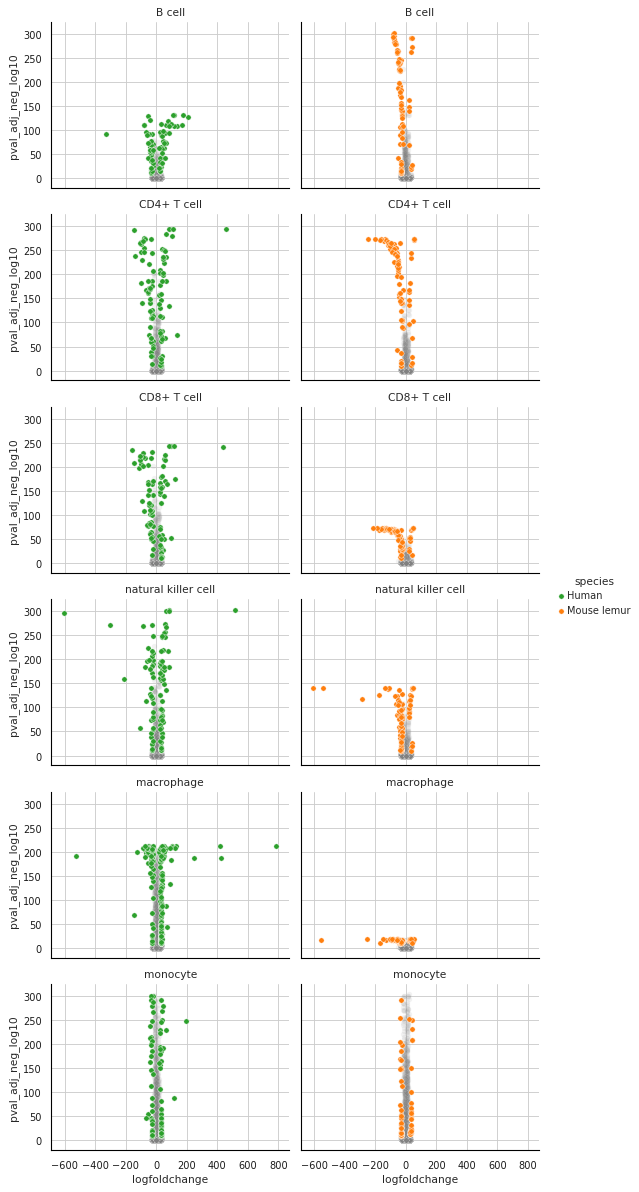

In [35]:
tab10 = sns.color_palette('tab10')
mouse_color, lemur_color, human_color = tab10[:3]

def scatterplot_significance(
    x,
    y,
    *args,
    logfoldchange_threshold=LOGFOLDCHANGE_THRESHOLD,
    neg_log10_pvalue_threshold=NEG_LOG10_PVALUE_THRESHOLD,
    **kwargs
):
    logfoldchange_mask = x.abs() > logfoldchange_threshold
    pvalue_mask = y > neg_log10_pvalue_threshold
    significance_mask = logfoldchange_mask & pvalue_mask

    # Plot insignificant in grey with low alpha (transparent)
    sns.scatterplot(
        x=x[~significance_mask], y=y[~significance_mask], color="grey", alpha=0.1
    )

    # Plot significant genes in color with no alpha
    sns.scatterplot(x=x[significance_mask], y=y[significance_mask], *args, **kwargs)


g = sns.FacetGrid(
    diffexpr_aggregated_tidy,
    col="species",
    hue="species",
    row="group",
    aspect=1.4,
    height=2.5,
    palette=[human_color, lemur_color],
)
g.map(scatterplot_significance, "logfoldchange", "pval_adj_neg_log10", rasterized=True)
g.set_titles("{row_name}")
for ax in g.axes.flat:
    title = ax.get_title()
    title = title.split(":")[-1].strip()
    ax.set_title(title)
g.add_legend()
g.tight_layout()

g.savefig(
    os.path.join(figure_folder_base, f"{tissue}__volcanoplot.pdf"), dpi=300
)

## Plot significant logfoldchange

In [30]:
pvalue_mask = (diffexpr_aggregated['pval_adj_neg_log10'] > NEG_LOG10_PVALUE_THRESHOLD).any(axis=1)
logfoldchange_mask = (diffexpr_aggregated['logfoldchange'].abs() > LOGFOLDCHANGE_THRESHOLD).any(axis=1)
diffexpr_aggregated_significant = diffexpr_aggregated.loc[pvalue_mask & logfoldchange_mask]
diffexpr_aggregated_significant

logfoldchange                   pval_adj                 \
species           Human Mouse lemur          Human    Mouse lemur   
gene_name                                                           
ACTB         -11.550832  -51.970669   1.257768e-03   6.112244e-43   
ADAM28        10.584956  -24.222576   3.792672e-26   1.000000e+00   
APOE         -10.424696  -38.952435   6.368947e-23   3.973581e-71   
ARHGEF3       -2.871186  -31.180578   2.041129e-04   4.666810e-18   
ATP6V0C       13.637417   22.964525   4.371592e-28   4.376021e-70   
...                 ...         ...            ...            ...   
VNN1          31.638525   28.069187   1.089427e-37   1.946492e-01   
XDH          -32.756992  -32.756992  2.487527e-198  2.412199e-167   
ZC3H10        -3.278907   33.192635   1.571069e-05   0.000000e+00   
ZG16           0.000000   38.324577   1.000000e+00  7.111118e-210   
ZNF791        26.393574   32.991982   3.273016e-01   4.775982e-58   

          pval_adj_neg_log10                  score              \
species                Human Mouse lemur      Human Mouse lemur   
gene_name                                                         
ACTB                2.900400   42.213799   3.958922  -14.032012   
ADAM28             25.421055    0.000000  11.002104   -0.146737   
APOE               22.195932   70.400818 -10.298102  -18.090534   
ARHGEF3             3.690130   17.330980  -4.407227   -9.034785   
ATP6V0C            27.359360   69.358921  11.401113   17.956455   
...                      ...         ...        ...         ...   
VNN1               36.962802    0.710747  13.026886    1.785614   
XDH               197.604232  166.617587 -30.186674  -27.716949   
ZC3H10              4.803805         inf  -4.631174   45.235565   
ZG16                0.000000  209.148062   0.000000   31.055685   
ZNF791              0.485052   57.320937   1.474236   16.245590   

          is_dissociation_gene              group  
species                                            
gene_name                                          
ACTB                      True   lymphoid: B cell  
ADAM28                   False   lymphoid: B cell  
APOE                      True   lymphoid: B cell  
ARHGEF3                  False   lymphoid: B cell  
ATP6V0C                  False   lymphoid: B cell  
...                        ...                ...  
VNN1                     False  myeloid: monocyte  
XDH                      False  myeloid: monocyte  
ZC3H10                   False  myeloid: monocyte  
ZG16                      True  myeloid: monocyte  
ZNF791                   False  myeloid: monocyte  

[1275 rows x 10 columns]

In [31]:
xlsx_significant = os.path.join(
    figure_folder_base,
    f"lemur_cross_species__{tissue}__differential_expression__significant_only.xlsx",
)

diffexpr_aggregated_significant.to_excel(xlsx_significant)

In [ ]:
from adjustText import adjust_text


def add_gene_names(
    x,
    y,
    *args,
    significance_multiplier=4,
    logfoldchange_threshold=LOGFOLDCHANGE_THRESHOLD,
    **kwargs,
):
    threshold = logfoldchange_threshold * significance_multiplier
    x_mask = x.abs() > (logfoldchange_threshold * significance_multiplier)
    y_mask = y.abs() > (logfoldchange_threshold * significance_multiplier)
    significance_mask = x_mask | y_mask
    x_masked = x[significance_mask]
    y_masked = y[significance_mask]

    texts = []
    xs_plotted = []
    ys_plotted = []
    for x0, y0, gene_name in zip(x, y, x.index):
        not_ribosomal = not gene_name.startswith("RP")
        if (abs(x0) > threshold or abs(y0) > threshold) and not_ribosomal:
            text = plt.annotate(gene_name, (x0, y0))
            xs_plotted.append(x0)
            ys_plotted.append(y0)
            #         else:
            #             text = plt.text(x0, y0, ' ')
            texts.append(text)

    sns.scatterplot(x=xs_plotted, y=ys_plotted, linewidth=0.5, edgecolor="red")

    # Get the points already plotted to avoid
    ax = plt.gca()
    scatter = ax.collections
    adjust_text(
        texts,
        np.asarray(xs_plotted),
        np.asarray(ys_plotted),
        #         add_objects=scatter,
        #         # Decrease precision
        #         precision=0.5,
        #         # Increase number of iterations
        #         lim=5000,
        # Add arrow
        save_steps=True,
        arrowprops=dict(arrowstyle="-", color="k", lw=0.5),
    )
    ax.axhline(color='k', zorder=-1)
    ax.axvline(color='k', zorder=-1)


g = sns.FacetGrid(
    data=diffexpr_aggregated_significant, col="group", aspect=1.5, col_wrap=2
)
g.map(sns.scatterplot, ("logfoldchange", "Human"), ("logfoldchange", "Mouse lemur"), rasterized=True)
g.map(add_gene_names, ("logfoldchange", "Human"), ("logfoldchange", "Mouse lemur"))
g.set_titles("{col_name}")
g.set(xlabel="Human log fold change", ylabel="Mouse lemur log fold change")
g.fig.tight_layout()

g.savefig(
    os.path.join(figure_folder_base, f"{tissue}__logfoldchange__human-vs-lemur.pdf", dpi=300)
)

## Plot logfoldchange

In [16]:
1+1

2

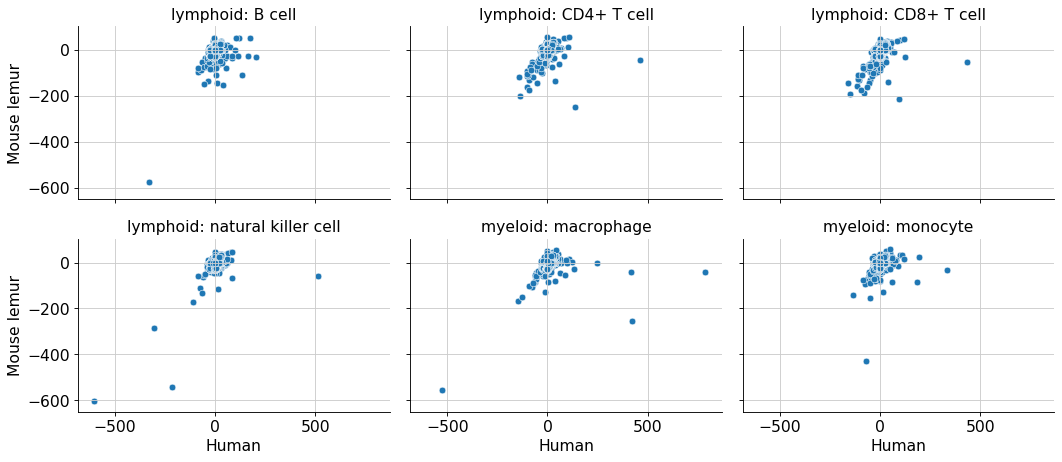

In [17]:
g = sns.FacetGrid(data=diffexpr_aggregated, col="group", aspect=1.5, col_wrap=3)
g.map(sns.scatterplot, ("logfoldchange", "Human"), ("logfoldchange", "Mouse lemur"))
g.set_titles("{col_name}")
g.set(xlabel="Human", ylabel="Mouse lemur")
g.fig.tight_layout()

g.savefig(
    os.path.join(figure_folder_base, f"{tissue}__logfoldchange__human-vs-lemur.pdf")
)

### Show where genes match up the most

In [18]:
# mask1 = diffexpr_aggregated['group'] == "lymphoid: B cell"
# mask2 = diffexpr_aggregated.logfoldchange > 20

# diffexpr_aggregated.loc[mask1 & mask2]

## Get genes changing in both human-mouse and lemur-mouse comparisons, find primate gain and loss

In [ ]:
tab10 = sns.color_palette('tab10')
mouse_color, lemur_color, human_color = tab10[:3]

def scatterplot_significance(
    x,
    y,
    *args,
    logfoldchange_threshold=LOGFOLDCHANGE_THRESHOLD,
    neg_log10_pvalue_threshold=NEG_LOG10_PVALUE_THRESHOLD,
    **kwargs
):
    logfoldchange_mask = x.abs() > logfoldchange_threshold
    pvalue_mask = y > neg_log10_pvalue_threshold
    significance_mask = logfoldchange_mask & pvalue_mask

    # Plot insignificant in grey with low alpha (transparent)
    sns.scatterplot(
        x=x[~significance_mask], y=y[~significance_mask], color="grey", alpha=0.1
    )

    # Plot significant genes in color with no alpha
    sns.scatterplot(x=x[significance_mask], y=y[significance_mask], *args, **kwargs)


g = sns.FacetGrid(
    diffexpr_aggregated_tidy,
    col="species",
    hue="species",
    row="group",
    aspect=1.4,
    height=2.5,
    palette=[human_color, lemur_color],
)
g.map(scatterplot_significance, "logfoldchange", "pval_adj_neg_log10", rasterized=True)
g.set_titles("{row_name}")
for ax in g.axes.flat:
    title = ax.get_title()
    title = title.split(":")[-1].strip()
    ax.set_title(title)
g.add_legend()
g.tight_layout()

g.savefig(
    os.path.join(figure_folder_base, f"{tissue}__volcanoplot.pdf"), dpi=300
) 

## Dotplots of primate loss of expression, ignoring dissociation associated genes

In [20]:
cross_species.de_dotplots(
    sort="score",
#     mean_only_expressed=True,
#     standard_scale="group",
    ignore_genes=dissociation_genes,
    primate_larger=False,
    save=True,
    save_format='pdf' 
    
)


------- group: lymphoid: B cell -------


ValueError: Image size of 230772x375 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 123078x200 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 123078x200 with 5 Axes>

## Dotplots of primate gain of expression

In [ ]:
cross_species.de_dotplots(
    sort="score",
#     mean_only_expressed=True,
#     standard_scale="group",
    ignore_genes=dissociation_genes,
    primate_larger=True,
    save=True,
    save_format='pdf' 
    
)